##### Imports

In [1]:
import pandas as pd
import yahooquery as yq
from yahooquery import Ticker
import matplotlib.pyplot as plt

### Gathering tickers
I've done my best to compile a list of all the tickers in the S&P 500. I must have missed one, as my list had 502 stocks and not 503 like Wikipedia states, but it should be good enough for the purposes of this assignment. Afterwards, I removed BF.B and BRK.B because YahooQuery could not give me tickers for those two symbols.

In [2]:
f = open("sp500.txt", 'r')
tickernames = f.read().strip().split('\n')
tickernames.sort()
tickers = {t: Ticker(t) for t in tickernames}

### Classifying tickers
I wanted to compare like with like, so I had to classify each ticker somehow. I considered partitioning them based on industry, both sector and market cap, or just sector.

##### Some helper methods

In [3]:
def sector(t):
    ap = tickers[t].asset_profile[t]
    if isinstance(ap, str):
        print('Could not find sector for', t)
        return None
    return tickers[t].asset_profile[t]['sector']
def industry(t):
    ap = tickers[t].asset_profile[t]
    if isinstance(ap, str):
        print('Could not find industry for', t)
        return None
    return tickers[t].asset_profile[t]['industry']
def cap_size(t):
    market_cap = tickers[t].price[t].get('marketCap')
    if market_cap > 1e10:
        return 'Large Cap'
    if market_cap > 2e9:
        return 'Medium Cap'
    else:
        return 'Small Cap'

Here, I categorize the tickers by industry. Many industries didn't even have 5 representatives (many only had 1), so I decided not to classify by industry.

In [ ]:
industries = {}
for t in tickernames:
    t_ind = industry(t)
    if t_ind not in industries.keys():
        industries[t_ind] = {t}
    else:
        industries[t_ind].add(t)
print([(i, len(industries[i])) for i in industries.keys()])
# Output: [('Diagnostics & Research', 12), ('Airlines', 5), ('Specialty Retail', 8), ('Consumer Electronics', 1), ('Drug Manufacturers—General', 10), ('Medical Distribution', 4), ('Medical Devices', 11), ('Insurance—Diversified', 3), ('Information Technology Services', 12), ('Software—Infrastructure', 10), ('Semiconductors', 14), ('Farm Products', 3), ('Staffing & Employment Services', 3), ('Software—Application', 12), ('Utilities—Regulated Electric', 23), ('Utilities—Diversified', 2), ('Insurance—Life', 5), ('Insurance—Specialty', 1), ('Insurance Brokers', 5), ('Specialty Chemicals', 10), ('Security & Protection Services', 1), ('Semiconductor Equipment & Materials', 4), ('Packaging & Containers', 7), ('Specialty Industrial Machinery', 17), ('Asset Management', 9), ('REIT—Specialty', 7), ('Internet Retail', 3), ('Computer Hardware', 5), ('Oil & Gas E&P', 11), ('Electronic Components', 3), ('Auto Parts', 3), ('REIT—Office', 2), ('Utilities—Regulated Gas', 2), ('Electronic Gaming & Multimedia', 3), ('REIT—Residential', 7), ('Utilities—Regulated Water', 1), ('Credit Services', 7), ('Aerospace & Defense', 10), ('Banks—Diversified', 4), ('Medical Instruments & Supplies', 9), ('Travel Services', 5), ('Oil & Gas Equipment & Services', 3), ('Packaged Foods', 9), ('Building Products & Equipment', 4), ('Farm & Heavy Construction Machinery', 3), ('Insurance—Property & Casualty', 6), ('Financial Data & Stock Exchanges', 8), ('Real Estate Services', 2), ('Chemicals', 2), ('Utilities—Renewable', 1), ('Agricultural Inputs', 4), ('Banks—Regional', 12), ('Household & Personal Products', 7), ('Integrated Freight & Logistics', 5), ('Telecom Services', 6), ('Healthcare Plans', 7), ('Restaurants', 6), ('Discount Stores', 5), ('Auto & Truck Dealerships', 2), ('Communication Equipment', 5), ('Railroads', 4), ('Specialty Business Services', 2), ('Drug Manufacturers—Specialty & Generic', 3), ('Oil & Gas Integrated', 2), ('Resorts & Casinos', 4), ('Residential Construction', 4), ('Entertainment', 9), ('Medical Care Facilities', 3), ('Consulting Services', 2), ('Solar', 3), ('REIT—Industrial', 3), ('Auto Manufacturers', 3), ('Industrial Distribution', 3), ('Copper', 1), ('REIT—Retail', 5), ('Scientific & Technical Instruments', 5), ('Health Information Services', 1), ('Internet Content & Information', 4), ('Capital Markets', 5), ('Leisure', 1), ('Home Improvement Retail', 2), ('Lodging', 2), ('Conglomerates', 2), ('REIT—Hotel & Motel', 1), ('Confectioners', 2), ('Biotechnology', 5), ('Advertising Agencies', 2), ('Engineering & Construction', 2), ('Beverages—Non-Alcoholic', 4), ('Oil & Gas Midstream', 4), ('Grocery Stores', 1), ('Furnishings, Fixtures & Appliances', 2), ('Building Materials', 2), ('Tobacco', 2), ('Oil & Gas Refining & Marketing', 3), ('Gold', 1), ('Footwear & Accessories', 1), ('Utilities—Independent Power Producers', 1), ('Steel', 2), ('Trucking', 1), ('REIT—Healthcare Facilities', 3), ('Insurance—Reinsurance', 1), ('Apparel Manufacturing', 2), ('Personal Services', 1), ('Apparel Retail', 2), ('Waste Management', 2), ('Tools & Accessories', 2), ('Beverages—Wineries & Distilleries', 1), ('Food Distribution', 1), ('Beverages—Brewers', 1), ('Luxury Goods', 1), ('Rental & Leasing Services', 1), ('REIT—Diversified', 1), ('Pharmaceutical Retailers', 1)]

Here, I categorize the tickers by both sector and market cap. There were no small cap stocks and very few medium cap stocks, so I decided not to use this as my classification method.

In [ ]:
seccap = {}
for t in tickernames:
    t_cap, t_sector = cap_size(t), sector(t)
    if (t_sector, t_cap) not in seccap.keys():
        seccap[(t_sector, t_cap)] = {t}
    else:
        seccap[(t_sector, t_cap)].add(t)
print([(k, len(seccap[k])) for k in seccap.keys()])
# Output: [(('Healthcare', 'Large Cap'), 62), (('Industrials', 'Medium Cap'), 7), (('Consumer Cyclical', 'Medium Cap'), 10), (('Technology', 'Large Cap'), 71), (('Financial Services', 'Large Cap'), 60), (('Consumer Defensive', 'Large Cap'), 35), (('Industrials', 'Large Cap'), 63), (('Utilities', 'Large Cap'), 28), (('Financial Services', 'Medium Cap'), 6), (('Basic Materials', 'Large Cap'), 21), (('Consumer Cyclical', 'Large Cap'), 49), (('Real Estate', 'Large Cap'), 29), (('Energy', 'Large Cap'), 23), (('Communication Services', 'Large Cap'), 21), (('Real Estate', 'Medium Cap'), 2), (('Communication Services', 'Medium Cap'), 3), (('Healthcare', 'Medium Cap'), 4), (('Technology', 'Medium Cap'), 2), (('Basic Materials', 'Medium Cap'), 1), (('Utilities', 'Medium Cap'), 2), (('Consumer Defensive', 'Medium Cap'), 1)]

Here, I categorize the tickers by sector. There's a good number of representatives in each sector (>20 in each sector), so I decide to use this as my classification.

In [4]:
sectors = {}
for t in tickernames:
    t_sec = sector(t)
    if t_sec not in sectors.keys():
        sectors[t_sec] = {t}
    else:
        sectors[t_sec].add(t)
print([(s, len(sectors[s])) for s in sectors.keys()])
    

[('Healthcare', 66), ('Industrials', 69), ('Consumer Cyclical', 59), ('Technology', 74), ('Financial Services', 66), ('Consumer Defensive', 36), ('Utilities', 30), ('Basic Materials', 22), ('Real Estate', 31), ('Energy', 23), ('Communication Services', 24)]


### Data collection
First, I needed to access the performance of each stock over the last 10 years.

In [5]:
def price_change(t, df):
    start_price = df.loc[df.index.values[0]]['close']
    start_date = df.index.values[0][1]
    end_price = df.loc[df.index.values[-1]]['close']
    end_date = df.index.values[-1][1]
    pc = end_price/start_price
    # print('Price for', t, 'went from', start_price, 'to', end_price, '-- a ratio of', pc, 'from', start_date, 'to', end_date)
    return pc
price_changes = {t: price_change(t, tickers[t].history(period="10y")) for t in tickernames}

sp500 = Ticker('^GSPC')
sp500df = sp500.history(period="10y")
sp500change = price_change('^GSPC', sp500df)
# sp500df['close'].plot(title="S and P 500 price")
# print(sp500df.loc[sp500df.index.values[0]]['close'])

# price_changes['^GSPC'] = price_change('^GSPC', sp500df)

I then collected some more data from each symbol: P/E ratio, beta, dividend yield, book value, debt to equity, gross profits, profit margins, and ESG score.  
Some symbols lack these data -- I store None for such cases.

In [6]:
tickerData = {}
for t in tickernames:
    tick = {}
    # print(t)
    tick['trailingPE'] = tickers[t].summary_detail[t].get('trailingPE')
    tick['beta'] = tickers[t].summary_detail[t].get('beta')
    tick['div_yield'] = tickers[t].summary_detail[t].get('trailingAnnualDividendYield')
    book = tickers[t].key_stats[t]
    tick['book_value'] = None if isinstance(book, str) else book.get('bookValue')
    # tick['book_value'] = tickers[t].key_stats[t].get('bookValue')
    tick['debt_to_equity'] = tickers[t].financial_data[t].get('debtToEquity')
    tick['gross_profits'] = tickers[t].financial_data[t].get('grossProfits')
    tick['profit_margins'] = tickers[t].financial_data[t].get('profitMargins')
    esg = tickers[t].esg_scores[t]
    tick['esg_score'] = None if isinstance(esg, str) else esg.get('totalEsg')
    # tick['esg_score'] = tickers[t].esg_scores[t].get('totalEsg')
    tickerData[t] = tick

I also considered the trend of "expert" recommendations over the last couple of months. I scored recommendations to reward strongBuy, buy, and hold recommendations, and to reward/punish a stock more for strong recommendations. In particular, I wanted some asymmetry in the scoring method to avoid the average recommendation trend being 0: I wanted recommendation trends to somewhat reflect what expert analysts think of the overarching stock market. (I don't know if the average trend would have been 0 in the case of perfect symmetry of weights, but it seemed plausible)

Time taken: ~1.5 min

In [7]:
def recommendation_score(t):
    rec_trend = tickers[t].recommendation_trend
    if rec_trend.empty:
        return -100
    rec_trend = [rec_trend['strongBuy'], rec_trend['buy'], rec_trend['hold'], rec_trend['sell'], rec_trend['strongSell']]
    rec_scores = []
    for i in range(4):
        score = 4 * rec_trend[0][i] + 2 * rec_trend[1][i] + 1 * rec_trend[2][i] - 1 * rec_trend[3][i] - 4 * rec_trend[4][i]
        rec_scores.append(score)
    return rec_scores[0]-rec_scores[1]
for t in tickernames:
    tickerData[t]['rec'] = recommendation_score(t)

### Index analysis
Now, I experiment to find which of these indices can predict performance. I plot each of them within each sector-size category: Stock Performance vs. Index Value. I also plot the performance of the S&P 500 as a baseline to compare with. I look for patterns qualitatively. Any correlations found here will be taken into account for non-income recommendations.

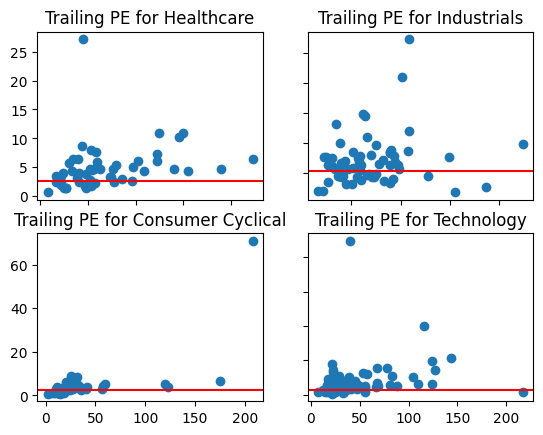

In [8]:
index = 'trailingPE'
all_sectors = list(sectors.keys())
plot, axs = plt.subplots(2, 2)
for i, sect in enumerate(all_sectors[:4]):
    x_axis, y_axis = [], []
    for t in sectors[sect]:
        if tickerData[t][index] != None:
            # remove what I observed to be outliers so the overall pattern is clearer
            if tickerData[t][index] > 300:
                continue
            x_axis.append(tickerData[t][index])
            y_axis.append(price_changes[t])
    axs[i//2, i % 2].scatter(x_axis, y_axis)
    axs[i//2, i % 2].set_title('Trailing PE for ' + sect)
    axs[i//2, i % 2].axhline(y = sp500change, color="red", linestyle='-')
for ax in axs.flat:
    ax.label_outer()
plt.show()

Here are my conclusions:
 * P/E ratio
   * Healthcare: Higher P/E is better, with exception for ridiculously high P/E (>1000)
   * Industrials: Difficult to correlate P/E with success
   * Consumer Cyclical: Difficult to correlate P/E with success
   * Technology: Higher P/E is somewhat better, with exception for ridiculously high P/E (>200)
   * Financial Services: Higher P/E tends to be better
   * Consumer Defensive: Difficult to correlate P/E with success
   * Utilities: Higher P/E tends to be better, with exception for rather high P/E (>40)
   * Basic Materials: Difficult to correlate P/E with success
   * Real Estate: Difficult to correlate P/E with success
   * Energy: Difficult to correlate P/E with success
   * Communication Services: Higher P/E slightly correlates with success
 * Beta
   * Healthcare: Difficult to correlate beta with success
   * Industrials: Difficult to correlate beta with success
   * Consumer Cyclical: Difficult to correlate beta with success
   * Technology: Difficult to correlate beta with success
   * Financial Services: Difficult to correlate beta with success
   * Consumer Defensive: Difficult to correlate beta with success
   * Utilities: Beta slightly negatively correlated with success
   * Basic Materials: Difficult to correlate beta with success
   * Real Estate: Difficult to correlate beta with success
   * Energy: Difficult to correlate beta with success
   * Communication Services: Difficult to correlate beta with success
 * Dividend Yields
   * Healthcare: Dividend yields are slightly negatively correlated with success
   * Industrials: Dividend yields are somewhat negatively correlated with success
   * Consumer Cyclical: Difficult to correlate dividend yields with success
   * Technology: Difficult to correlate dividend yields with success
   * Financial Services: Dividend yields are negatively correlated with success
   * Consumer Defensive: Dividend yields are negatively correlated with success
   * Utilities: Dividend yields are negatively correlated with success
   * Basic Materials: Difficult to correlate dividend yields with success
   * Real Estate: Dividend yields are somewhat negatively correlated with success
   * Energy: Difficult to correlate dividend yields with success
   * Communication Services: Difficult to correlate dividend yields with success
 * Book Value
   * Healthcare: Difficult to correlate book value with success
   * Industrials: Difficult to correlate book value with success
   * Consumer Cyclical: Difficult to correlate book value with success
   * Technology: Difficult to correlate book value with success
   * Financial Services: Difficult to correlate book value with success
   * Consumer Defensive: Difficult to correlate book value with success
   * Utilities: Difficult to correlate book value with success
   * Basic Materials: Difficult to correlate book value with success
   * Real Estate: Difficult to correlate book value with success
   * Energy: Book value slightly positively correlated with success
   * Communication Services: Difficult to correlate book value with success
 * Debt to Equity
   * Healthcare: Difficult to correlate debt-to-equity with success
   * Industrials: Difficult to correlate debt-to-equity with success
   * Consumer Cyclical: Difficult to correlate debt-to-equity with success
   * Technology: Difficult to correlate debt-to-equity with success
   * Financial Services: Difficult to correlate debt-to-equity with success
   * Consumer Defensive: Difficult to correlate debt-to-equity with success
   * Utilities: Difficult to correlate debt-to-equity with success
   * Basic Materials: Difficult to correlate debt-to-equity with success
   * Real Estate: Difficult to correlate debt-to-equity with success
   * Energy: Difficult to correlate debt-to-equity with success
   * Communication Services: Difficult to correlate debt-to-equity with success
 * Gross Profits
   * Healthcare: Difficult to correlate gross profits with success
   * Industrials: Gross profits negatively correlated with success
   * Consumer Cyclical: Difficult to correlate gross profits with success
   * Technology: Gross profits negatively correlated with success
   * Financial Services: Gross profits negatively correlated with success
   * Consumer Defensive: Difficult to correlate gross profits with success
   * Utilities: Difficult to correlate gross profits with success
   * Basic Materials: Difficult to correlate gross profits with success
   * Real Estate: Difficult to correlate gross profits with success
   * Energy: Difficult to correlate gross profits with success
   * Communication Services: Difficult to correlate gross profits with success
 * Profit Margins
   * Healthcare: Difficult to correlate profit margins with success
   * Industrials: Profit margins somewhat positively correlated with success
   * Consumer Cyclical: Difficult to correlate profit margins with success
   * Technology: Difficult to correlate profit margins with success
   * Financial Services: Difficult to correlate profit margins with success
   * Consumer Defensive: Difficult to correlate profit margins with success
   * Utilities: Profit margins somewhat positively correlated with success
   * Basic Materials: Difficult to correlate profit margins with success
   * Real Estate: Difficult to correlate profit margins with success
   * Energy: Difficult to correlate profit margins with success
   * Communication Services: Difficult to correlate profit margins with success
 * ESG Score
   * Healthcare: Difficult to correlate ESG score with success
   * Industrials: Difficult to correlate ESG score with success
   * Consumer Cyclical: Difficult to correlate ESG score with success
   * Technology: Difficult to correlate ESG score with success
   * Financial Services: ESG score slightly negatively correlated with success
   * Consumer Defensive: Difficult to correlate ESG score with success
   * Utilities: Difficult to correlate ESG score with success
   * Basic Materials: Difficult to correlate ESG score with success
   * Real Estate: Difficult to correlate ESG score with success
   * Energy: Difficult to correlate ESG score with success
   * Communication Services: Difficult to correlate ESG score with success

### The program itself

In [9]:
def percentile(t, index):
    sect = sector(t)
    val = tickerData[t][index] if index != 'change' else price_changes[t]
    if val == None:
        print('Error: no value for ticker', t, 'and index', index)
        return 0
    num_beat, num_data = 0, 0
    for tick in sectors[sect]:
        valprime = tickerData[tick][index] if index != 'change' else price_changes[t]
        if valprime != None:
            num_data += 1
            if val > valprime:
                num_beat += 1
    return num_beat/num_data

#### Default recommendation
In general, I take into account dividend yields, P/E ratio, and recommendation trend when recommending a stock. For the first two, I only take them into account if I deemed them applicable to the sector as in the above. Based on the weightings I encoded for each result, the most weight is given to the recommendation trend with the assumption that using an **ensemble** of models (like a group of analysts' models) is often more accurate than a single prediction.

In [10]:
def general_invest(t, adjustibles):
    sect = sector(t)
    pros, cons = [], []
    pe_pos = ['Healthcare', 'Technology', 'Financial Services', 'Utilities', 'Communication Services']
    pe_thres = {'Healthcare': 1000, 'Technology': 200, 'Utilities': 40}
    div_neg = ['Healthcare', 'Industrials', 'Financial Services', 'Consumer Defensive', 'Utilities', 'Real Estate']

    score = 0
    
    if sect in div_neg:
        div = tickerData[t]['div_yield']
        div_percentile = percentile(t, 'div_yield')
        if div_percentile >= .8:
            cons.append('  Dividend yields are '+str(div)+', the '+str(int(100*div_percentile))+'% percentile in the sector. High dividends, implying probably low growth in this sector.')
            score -= adjustibles[0][0]
        else:
            pros.append('  Dividend yields are '+str(div)+', the '+str(int(100*div_percentile))+'% percentile in the sector. Not high dividends, does not imply low growth in this sector.')
            score += adjustibles[0][1]
    else: print('Dividend yields are not a good metric for this stock.')
    if sect in pe_pos:
        pe = tickerData[t]['trailingPE']
        pe_percentile = percentile(t, 'trailingPE')
        if sect in pe_thres.keys() and pe > pe_thres[sect]:
            cons.append('  P/E ratio is '+str(pe)+', very high. Risky investment.')
            score -= adjustibles[1][0]
        elif pe_percentile > .3:
            pros.append('  P/E ratios is '+str(pe)+', the '+str(int(100*pe_percentile))+'% percentile in the sector. Reasonably high P/E ratio, which is good.')
            score += adjustibles[1][1]
        else:
            cons.append('  P/E ratios is '+str(pe)+', the '+str(int(100*pe_percentile))+'% percentile in the sector. Rather low P/E ratio, which is not great.')
            score -= adjustibles[1][2]
    else: print('P/E ratio is not a good metric for this stock.')
    
    rec_score = tickerData[t]['rec']
    score += rec_score
    rec_percentile = percentile(t, 'rec')
    if rec_percentile >= .5:
        pros.append('  Recommendation score (change over last month) is '+str(rec_score)+', the '+str(int(100*rec_percentile))+'% percentile in the sector. Relatively good recommendation change.')
        score += adjustibles[2][0]
    else:
        cons.append('  Recommendation score (change over last month) is '+str(rec_score)+', the '+str(int(100*rec_percentile))+'% percentile in the sector. Relatively low recommendation change.')
        score -= adjustibles[2][1]
    if rec_score >= 8:
        pros.append('  Recommendation score (change over last month) is '+str(rec_score)+'. Positive recommendation change.')
    elif rec_score <= -8:
        cons.append('  Recommendation score (change over last month) is '+str(rec_score)+'. Negative recommendation change.')
    
    return pros, cons, score

I essentially just use the general recommender to make the default recommendation.

In [11]:
def invest_default(t):
    print('Analyzing ticker', t, 'generally.')

    pros, cons, score = general_invest(t, [(1, 1), (5, 2, 1), (2, 2)])

    print("Pros:")
    for p in pros:
        print(p)
    print("Cons:")
    for c in cons:
        print(c)
    print('Verdict:')
    if score >= 5:
        print('  Buy')
        return 'buy'
    elif score <= -3:
        print('  Sell')
        return 'sell'
    else:
        print('  Hold')
        return 'hold'

#### Growth stocks
What makes a good growth stock is one that has shown it can sustain strong growth, and one that has the room in the market to grow (in particular, it definitely shouldn't be an overvalued stock). This is tricky for a program to analyze, since the approach I'd take is to study the company's industry trends, leadership background and approach, and target market -- none of which seem very conducive to an automated approach without training an impressive NLP model and sentiment analyzer.  
Thus, my approach is to largely look at the same categories as in the general recommender (using the indices I found to be correlated with success in the previous section), only with a greater emphasis on price to earnings ratio: I need growth stocks to be in the sweet spot of having a high enough P/E to indicate investor sentiment being bullish on its growth, while definitely not having such a high P/E that it seems overvalued.  
Also, with a growth stock, I'm more willing to take on risk -- I'd actually like a higher beta so the stock can grow more.

In [12]:
def invest_growth(t):
    print('Analyzing ticker', t, 'for growth.')

    # Changed weightings so P/E ratio is more important
    pros, cons, score = general_invest(t, [(1, 1), (5, 5, 3), (2, 2)])

    beta = tickerData[t]['beta']
    beta_percentile = percentile(t, 'beta')
    if beta_percentile >= .9:
        cons.append('  Beta is '+str(beta)+', the '+str(int(100*beta_percentile))+'% percentile in the sector. Too high of a beta.')
        score -= 3
    elif beta_percentile >= .5:
        pros.append('  Beta is '+str(beta)+', the '+str(int(100*beta_percentile))+'% percentile in the sector. Good, high beta.')
        score += 5
    elif beta_percentile >= .3:
        pros.append('  Beta is '+str(beta)+', the '+str(int(100*beta_percentile))+'% percentile in the sector. Somewhat high beta.')
        score += 2
    else:
        cons.append('  Beta is '+str(beta)+', the '+str(int(100*beta_percentile))+'% percentile in the sector. Not high enough of a beta.')
        score -= 2

    print("Pros:")
    for p in pros:
        print(p)
    print("Cons:")
    for c in cons:
        print(c)
    print('Verdict:')
    if score >= 5:
        print('  Buy')
        return 'buy'
    elif score <= -3:
        print('  Sell')
        return 'sell'
    else:
        print('  Hold')
        return 'hold'

#### ESG-conscious recommendation
I again use a similar approach to the general recommendation program, only with a threshold on ESG: the stock must not be in the bottom 35% of its sector for me to recommend at least holding it.  
Relatively high ESG scores are also rewarded.

In [13]:
def invest_esg(t):
    print('Analyzing ticker', t, 'for ESG.')

    pros, cons, score = general_invest(t, [(1, 1), (5, 2, 1), (2, 2)])

    esg = tickerData[t]['esg_score']
    esg_percentile = percentile(t, 'esg_score')
    if esg_percentile >= .7:
        pros.append('  ESG score is '+str(esg)+', the '+str(int(100*esg_percentile))+'% percentile in the sector. Relatively high ESG score.')
        score += 3
    elif esg_percentile >= .35:
        pros.append('  ESG score is '+str(esg)+', the '+str(int(100*esg_percentile))+'% percentile in the sector. OK ESG score.')
    else:
        cons.append('  ESG score is '+str(esg)+', the '+str(int(100*esg_percentile))+'% percentile in the sector. Relatively low ESG score.')

    print("Pros:")
    for p in pros:
        print(p)
    print("Cons:")
    for c in cons:
        print(c)
    print('Verdict:')
    if esg_percentile < .35:
        print('  Sell')
        return 'sell'
    elif score >= 5:
        print('  Buy')
        return 'buy'
    elif score <= -3:
        print('  Sell')
        return 'sell'
    else:
        print('  Hold')
        return 'hold'

#### Income stocks
The goal for income stocks is simple: reliable dividend yields (among its sector). I don't think a good income stock can have very low dividend yields, even if its' ultra stable, so that's my condition for a 'hold' or higher. To 'buy,' I also check if the stock has been stable by looking for a relatively low beta and low change in price. Growth isn't necessary for an income stock.

In [14]:
def invest_income(t):
    print("Analyzing ticker", t, "for income.")
    sect = sector(t)
    num_sec = len(sectors[sect])
    pros, cons = [], []

    div = tickerData[t]['div_yield']
    div_percentile = percentile(t, 'div_yield')
    if div_percentile >= .25:
        pros.append('  Dividend yields are ' + str(div) + ', the ' + str(int(div_percentile * 100)) + '% percentile of the sector. Good dividends.')
    else:
        cons.append('  Dividend yields are ' + str(div) + ', the ' + str(int(div_percentile * 100)) + '% percentile of the sector. Not much dividends.')
    
    beta = tickerData[t]['beta']
    beta_percentile = percentile(t, 'beta')
    if beta_percentile >= .7:
        cons.append('  Beta is ' + str(beta) + ", lower than only " + str(int(beta_percentile * 100)) + '% of the sector. Too volatile.')
    else:
        pros.append('  Beta is ' + str(beta) + ", lower than a whole " + str(int(beta_percentile * 100)) + '% of the sector. Stable.')

    change = price_changes[t]
    change_percentile = percentile(t, 'change')
    if change_percentile >= .7:
        cons.append('  Price change is ' + str(beta) + ", lower than only " + str(int(beta_percentile * 100)) + '% of the sector. Too volatile.')
    else:
        pros.append('  Price change is ' + str(beta) + ", lower than a whole " + str(int(beta_percentile * 100)) + '% of the sector. Stable.')
    print("Pros:")
    for p in pros:
        print(p)
    print("Cons:")
    for c in cons:
        print(c)
    print("Verdict:")
    if len(pros) == 3:
        print('  Buy')
        return 'buy'
    elif div_percentile >= 0.25:
        print('  Hold')
        return 'hold'
    else:
        print('  Sell')
        return 'sell'

In [15]:
def invest(ticker, client=False):
    ticker = ticker.upper()
    if client == False:
        return invest_default(ticker)
    if client == 'growth':
        return invest_growth(ticker)
    if client == 'income':
        return invest_income(ticker)
    return invest_esg(ticker)

One example of output

In [16]:
invest('aapl')
invest('aapl', 'growth')
invest('aapl', 'esg')
invest('aapl', 'income')

Analyzing ticker AAPL generally.
Dividend yields are not a good metric for this stock.
Pros:
  P/E ratios is 28.578856, the 38% percentile in the sector. Reasonably high P/E ratio, which is good.
  Recommendation score (change over last month) is 1, the 63% percentile in the sector. Relatively good recommendation change.
Cons:
Verdict:
  Buy
Analyzing ticker AAPL for growth.
Dividend yields are not a good metric for this stock.
Pros:
  P/E ratios is 28.578856, the 38% percentile in the sector. Reasonably high P/E ratio, which is good.
  Recommendation score (change over last month) is 1, the 63% percentile in the sector. Relatively good recommendation change.
  Beta is 1.297088, the 65% percentile in the sector. Good, high beta.
Cons:
Verdict:
  Buy
Analyzing ticker AAPL for ESG.
Dividend yields are not a good metric for this stock.
Pros:
  P/E ratios is 28.578856, the 38% percentile in the sector. Reasonably high P/E ratio, which is good.
  Recommendation score (change over last month

'buy'

A different ticker as an example, where the recommendations are not the same.

In [17]:
invest('mrk')
invest('mrk', 'income')

Analyzing ticker MRK generally.
Pros:
  Dividend yields are 0.023413898, the 69% percentile in the sector. Not high dividends, does not imply low growth in this sector.
  P/E ratios is 38.42181, the 66% percentile in the sector. Reasonably high P/E ratio, which is good.
Cons:
  Recommendation score (change over last month) is -16, the 12% percentile in the sector. Relatively low recommendation change.
  Recommendation score (change over last month) is -16. Negative recommendation change.
Verdict:
  Sell
Analyzing ticker MRK for income.
Pros:
  Dividend yields are 0.023413898, the 69% percentile of the sector. Good dividends.
  Beta is 0.372384, lower than a whole 4% of the sector. Stable.
  Price change is 0.372384, lower than a whole 4% of the sector. Stable.
Cons:
Verdict:
  Buy


'buy'

Another example, where 'buy,' 'sell,' and 'hold' are all recommended for different purposes.

In [18]:
invest('nvr')
invest('nvr', 'growth')
invest('nvr', 'income')

Analyzing ticker NVR generally.
Dividend yields are not a good metric for this stock.
P/E ratio is not a good metric for this stock.
Pros:
  Recommendation score (change over last month) is 2, the 61% percentile in the sector. Relatively good recommendation change.
Cons:
Verdict:
  Hold
Analyzing ticker NVR for growth.
Dividend yields are not a good metric for this stock.
P/E ratio is not a good metric for this stock.
Pros:
  Recommendation score (change over last month) is 2, the 61% percentile in the sector. Relatively good recommendation change.
  Beta is 0.997559, the 32% percentile in the sector. Somewhat high beta.
Cons:
Verdict:
  Buy
Analyzing ticker NVR for income.
Error: no value for ticker NVR and index div_yield
Pros:
  Beta is 0.997559, lower than a whole 32% of the sector. Stable.
  Price change is 0.997559, lower than a whole 32% of the sector. Stable.
Cons:
  Dividend yields are None, the 0% percentile of the sector. Not much dividends.
Verdict:
  Sell


'sell'